In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


In [11]:

df = pd.read_csv('./spambase/spambase.data', delimiter=';')
df.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
df.shape

(4601, 58)

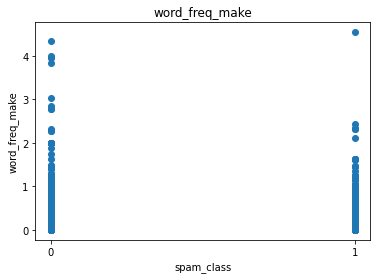

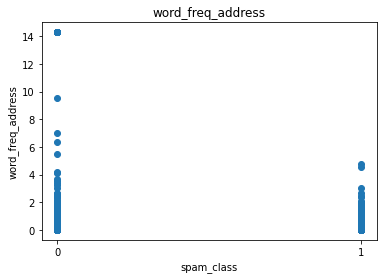

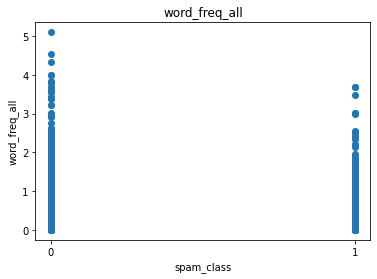

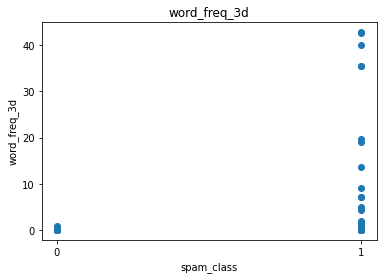

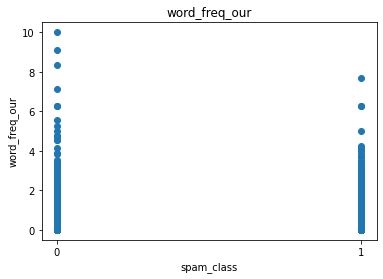

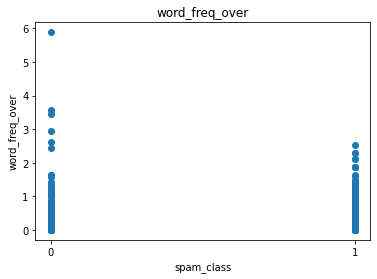

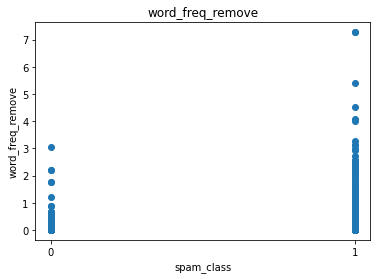

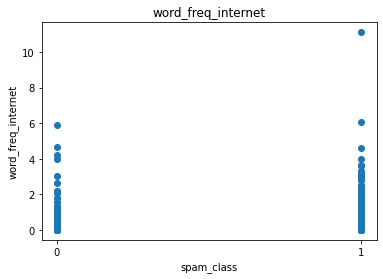

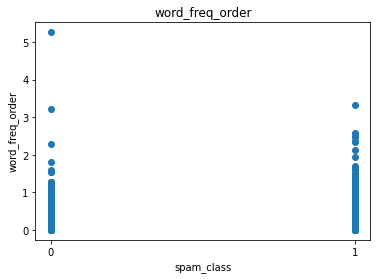

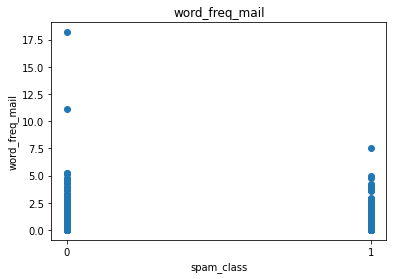

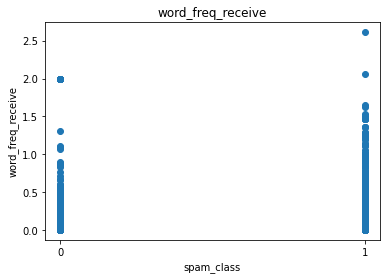

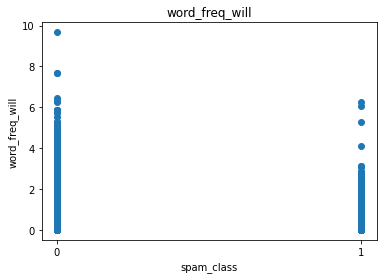

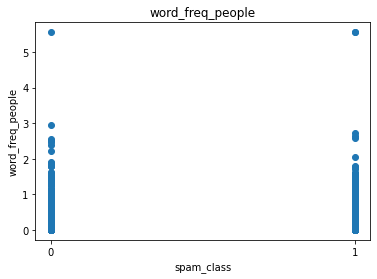

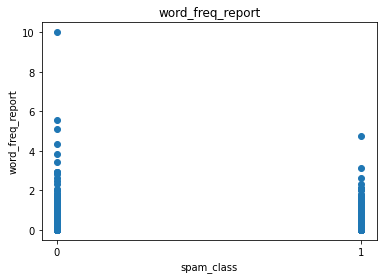

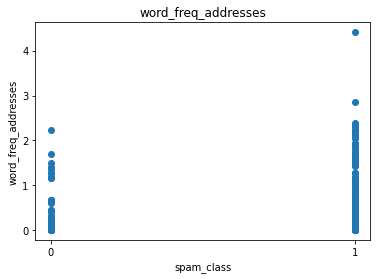

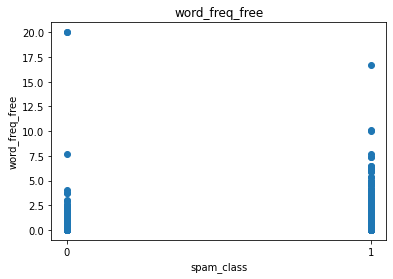

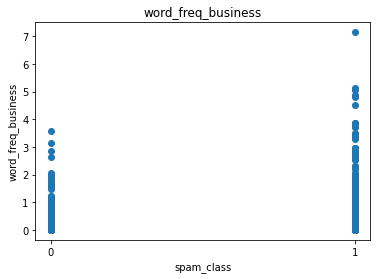

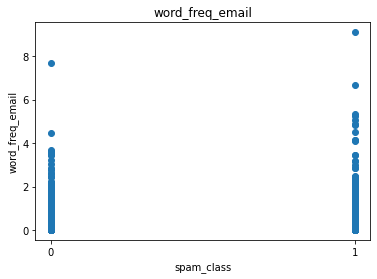

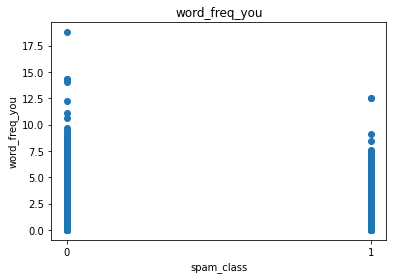

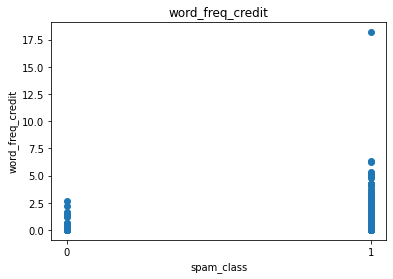

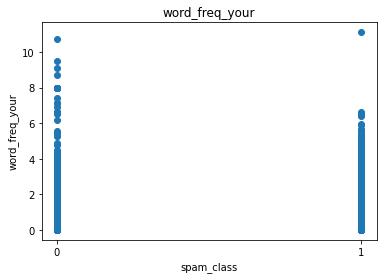

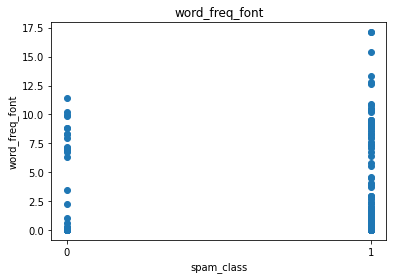

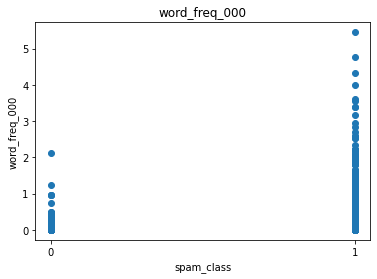

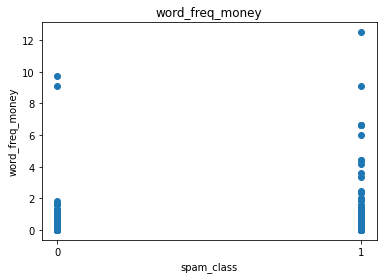

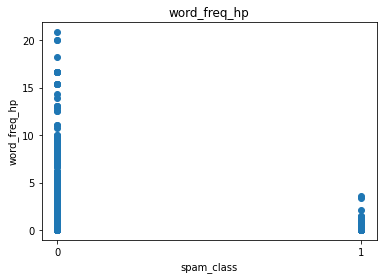

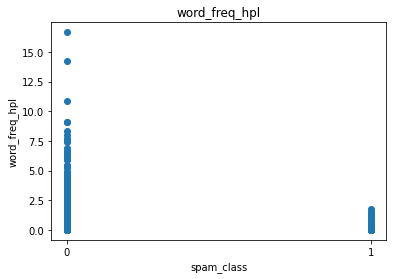

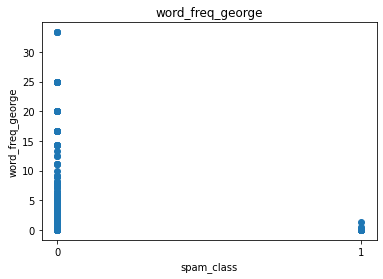

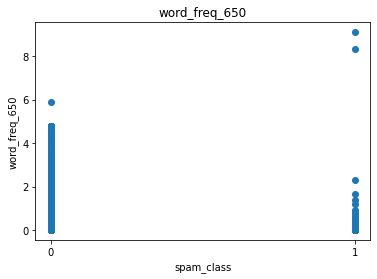

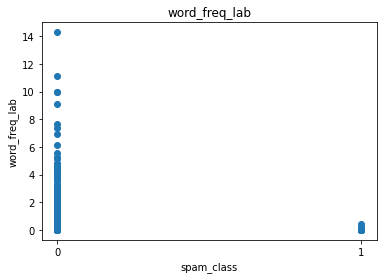

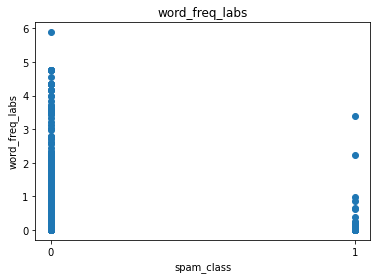

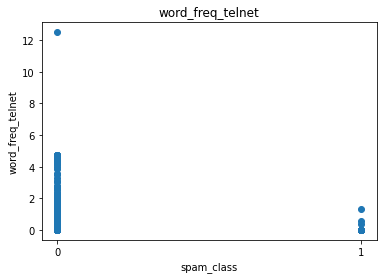

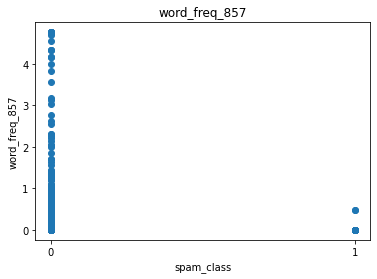

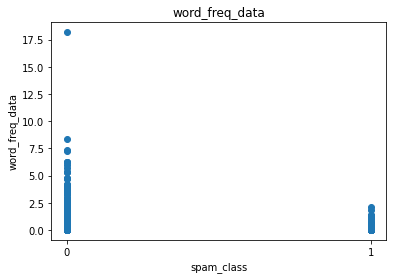

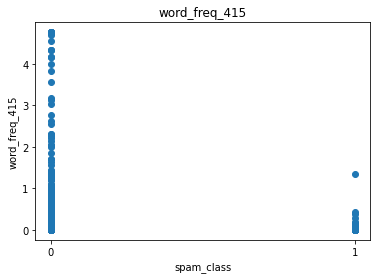

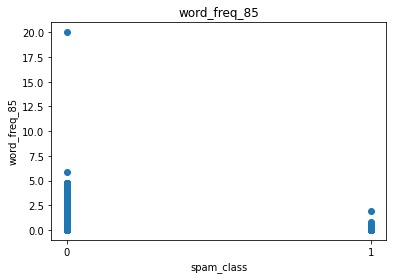

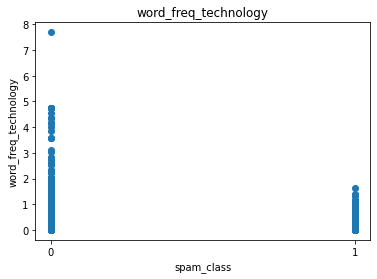

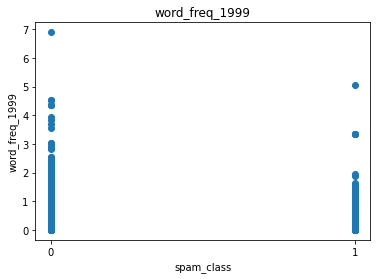

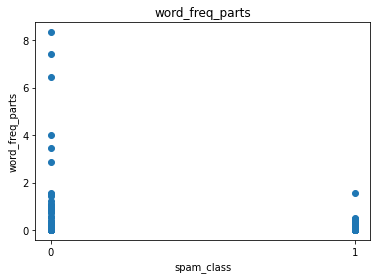

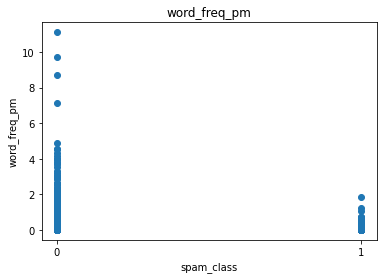

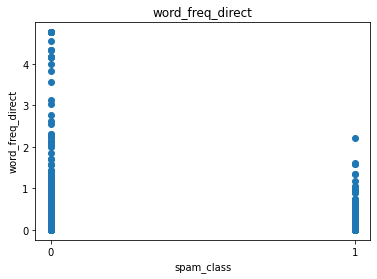

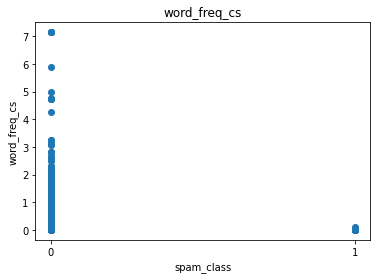

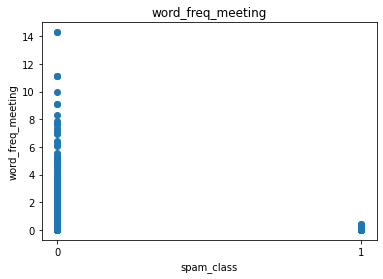

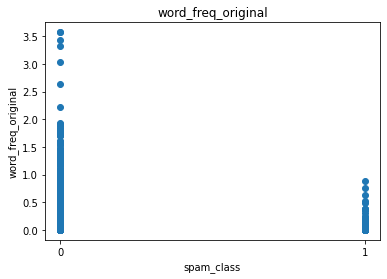

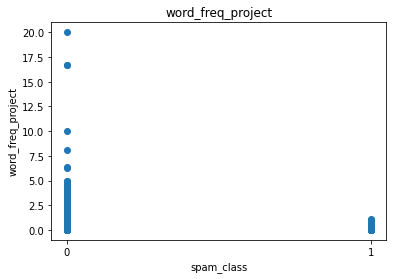

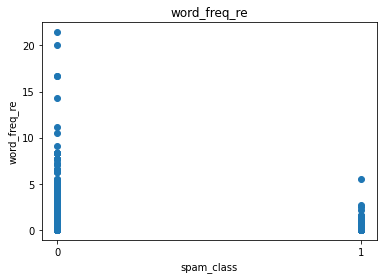

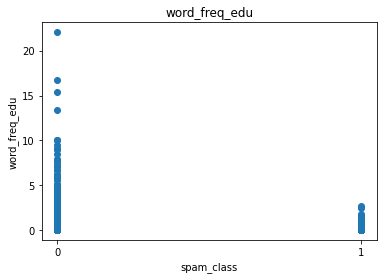

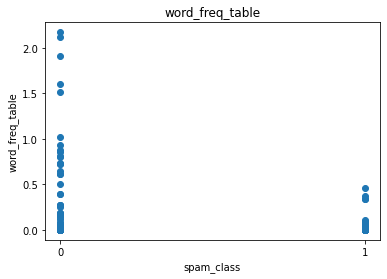

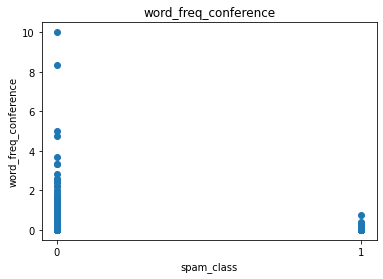

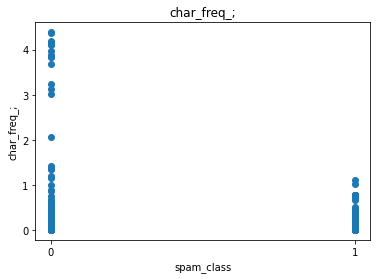

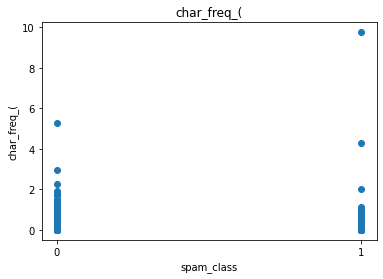

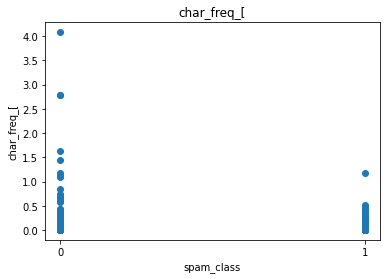

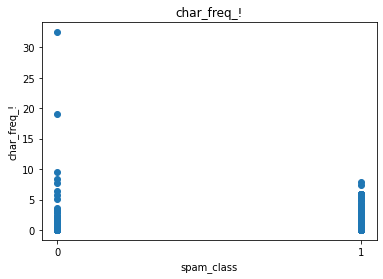

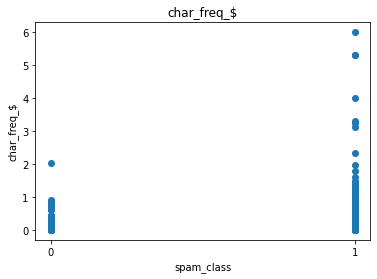

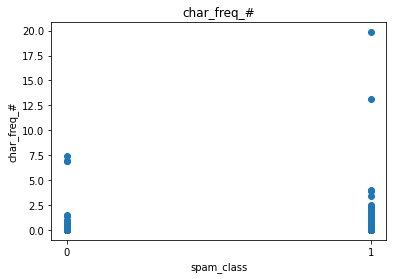

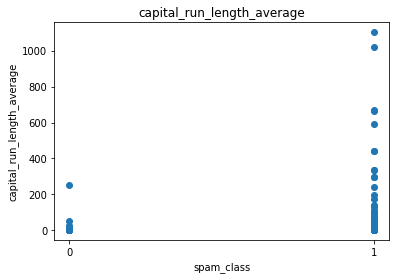

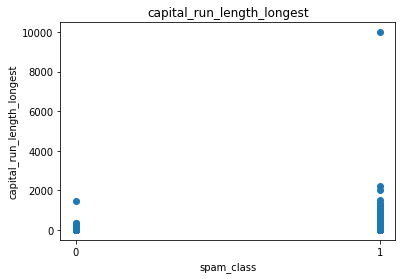

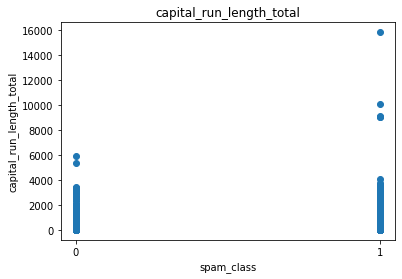

In [12]:
for label in df.columns[:-1]:
    plt.scatter(df['spam_class'], df[label])
    plt.xticks(np.arange(0, 2, step = 1))
    plt.title(label)
    plt.xlabel('spam_class')
    plt.ylabel(label)
    plt.savefig('imgs/scatterplot/'+'scatterplot'.join(label.split(' ')))
    plt.show()

In [19]:
for i in df.columns[:-1]:
    media = np.mean(df[i])
    desvpad = np.std(df[i])

    print(f'{i}')
    print(f'media : {media}')
    print(f'desvio padrão : {desvpad}')
    print('-------')

word_freq_make
media : 0.10455335796565964
desvio padrão : 0.3053243763947219
-------
word_freq_address
media : 0.21301456205172786
desvio padrão : 1.2904349339008443
-------
word_freq_all
media : 0.28065637904803303
desvio padrão : 0.5040880946404966
-------
word_freq_3d
media : 0.06542490762877635
desvio padrão : 1.394999748325344
-------
word_freq_our
media : 0.312223429689198
desvio padrão : 0.6724396819868047
-------
word_freq_over
media : 0.09590089111062812
desvio padrão : 0.27379432437438794
-------
word_freq_remove
media : 0.11420778091719191
desvio padrão : 0.3913988137132016
-------
word_freq_internet
media : 0.10529450119539231
desvio padrão : 0.40102786485710107
-------
word_freq_order
media : 0.09006737665724841
desvio padrão : 0.27858558484553503
-------
word_freq_mail
media : 0.23941317104977178
desvio padrão : 0.644685328767438
-------
word_freq_receive
media : 0.05982395131493154
desvio padrão : 0.20152276059689317
-------
word_freq_will
media : 0.5417018039556618
des

In [22]:
from sklearn.utils import shuffle
df = shuffle(df)
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_class
938,0.05,0.05,0.40,0.0,0.34,0.00,0.00,0.00,0.57,0.05,...,0.019,0.099,0.000,0.089,0.079,0.009,4.913,95,1312,1
1610,0.00,0.00,0.00,0.0,0.00,1.21,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,1.627,0.000,0.465,2.591,31,127,1
1458,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.653,0.000,0.000,8.000,38,80,1
2824,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.705,7,29,0
1271,0.00,0.52,1.05,0.0,2.63,0.52,1.05,0.00,0.00,0.00,...,0.000,0.000,0.091,1.276,0.729,0.091,3.062,19,98,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,0.00,0.00,0.00,0.0,0.13,0.00,0.00,0.55,0.00,0.00,...,0.071,0.143,0.000,0.000,0.053,0.000,2.662,22,418,0
1197,0.67,0.00,0.67,0.0,0.00,0.00,0.00,0.00,0.00,0.67,...,0.000,0.000,0.000,2.413,0.000,0.000,3.384,37,132,1
487,0.00,0.00,0.37,0.0,1.11,0.74,0.00,2.96,0.00,2.96,...,0.000,0.149,0.000,1.096,0.000,0.000,5.160,107,289,1
705,0.00,0.00,0.00,0.0,0.00,0.00,4.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,8.166,19,49,1


In [25]:
x = df[df.columns[:-1]]
y = df['spam_class']
sc = StandardScaler()

x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

In [29]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
resultados_dt = dt.predict(x_test)

acc_dt = accuracy_score(y_test, resultados_dt)
matriz_dt = confusion_matrix(y_test, resultados_dt)

print(f'Acurácia: {acc_dt}')
print(f'Matriz de Confusão:\n{matriz_dt}')

Acurácia: 0.9174630755864466
Matriz de Confusão:
[[651  49]
 [ 46 405]]


In [30]:
mlp = MLPClassifier()
mlp.fit(x_train, y_train)
resultados_mlp = mlp.predict(x_test)

acc_mlp = accuracy_score(y_test, resultados_mlp)
matriz_mlp = confusion_matrix(y_test, resultados_mlp)

print(f'Acurácia: {acc_mlp}')
print(f'Matriz de Confusão:\n{matriz_mlp}')


Acurácia: 0.9496090356211989


d:\Documentos\ifpe\AM\AM-EmailSpam\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


NameError: name 'matriz_mlp' is not defined